En este ejercicio tendremos que limpiar los outliers.

1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

2. Identifica visualmente los outliers

3. Identifica sobre el dataframe las filas que son outliers

4. Reemplaza los outliers por el estadístico más correcto.

5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("../../datos/attacks_limpio_2.csv", index_col = 0)
df.head(2)

,case_number,year,mes,country,type,area,activity,age,sex,species,injury,fatal
0,1800.00.00,1800,NaN,seychelles,Unprovoked,St. Anne,a corsair's boat was overturned,NaN,F,NaN,"FATAL, all onboard were killed by sharks",y
1,1797.05.28.R,1797,May,NaN,Unprovoked,NaN,Dropped overboard,NaN,NaN,NaN,FATAL,y


In [31]:
df.shape

(6328, 12)

1 ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [21]:
#Sobre la columna "year", "edad" ya que son variables numéricas y los outliers solo se pueden trabajar sobre este tipo de variables.

columnas_numericas = df.select_dtypes(include = np.number)

In [15]:
columnas_numericas.columns

Index(['year', 'age'], dtype='object')

In [6]:
df.head(2)

,case_number,year,mes,country,type,area,activity,age,sex,species,injury,fatal
0,1800.00.00,1800,NaN,seychelles,Unprovoked,St. Anne,a corsair's boat was overturned,NaN,F,NaN,"FATAL, all onboard were killed by sharks",y
1,1797.05.28.R,1797,May,NaN,Unprovoked,NaN,Dropped overboard,NaN,NaN,NaN,FATAL,y


2 Identifica visualmente los outliers

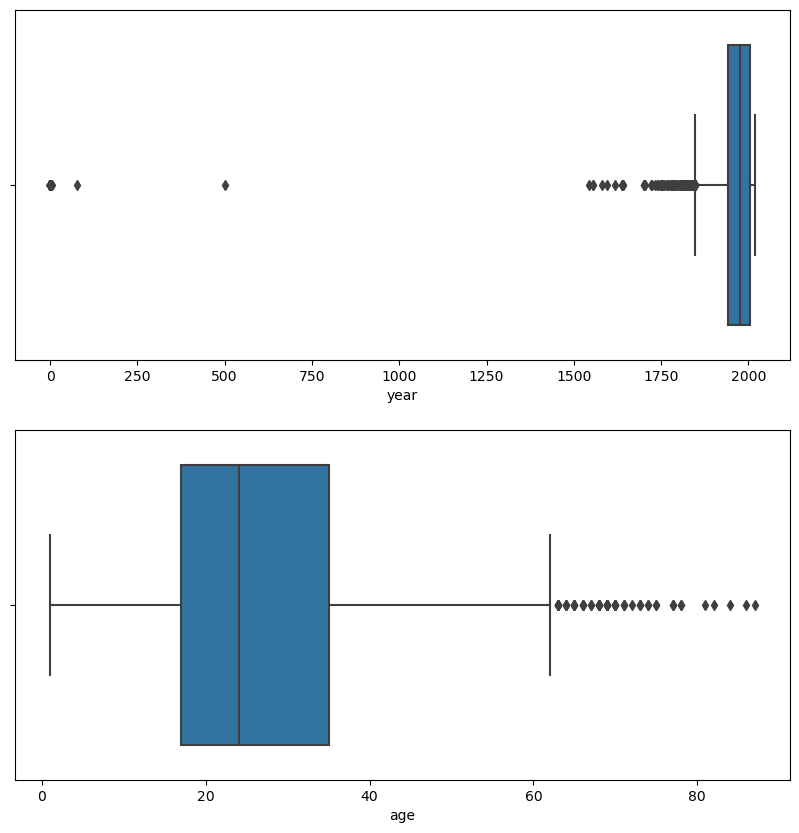

In [9]:
#Lo haremos generando un boxplot para su mejor visualización

fig, axes = plt.subplots(len(outliers.columns),1, figsize=(10,10))

for i in range(len(outliers.columns)):
    sns.boxplot(x= df[outliers.columns[i]], data= df, ax= axes[i]);
    
plt.show()

In [10]:
# Exploramos los valores únicos de 'age'
df['age'].unique()

array([nan, 14., 19., 20., 15., 21., 27., 36., 25.,  6., 16., 50., 13.,
       57., 11., 48., 18., 52., 12., 32., 10., 34., 30., 60., 33., 29.,
       54., 41., 37., 56., 69., 38., 55., 35., 46., 45., 28., 24., 26.,
       49., 22.,  7., 31., 17., 40., 42.,  3.,  8., 82., 73., 68., 51.,
       39., 58., 47., 61., 65., 66., 43.,  9., 72., 59., 64., 23., 71.,
       44., 62., 63., 70., 53., 77., 74.,  5., 86., 84., 75., 87., 67.,
        1.,  2., 81., 78.])

3 Identifica sobre el dataframe las filas que son outliers

In [12]:
#Creamos función para poder aplicarlo en las columnas necesarias

def calcular_outliers (df,lista_columnas):

    dicc_indices = {}

    for col in lista_columnas:
    
        Q1 = np.nanpercentile (df[col], 25)
        Q3 = np.nanpercentile (df[col], 75)

        IQR = Q3 - Q1

        outlier_step = 1.5*IQR
        
        outliers_data = df[(df[col]< Q1 - outlier_step) | (df[col]> Q3 + outlier_step)]
        
        if outliers.shape[0] > 0:

            dicc_indices[col] = (list(outliers_data.index)) 

    return dicc_indices

In [24]:
columnas_numericas_lista = list(columnas_numericas)
columnas_numericas_lista

['year', 'age']

4 Reemplaza los outliers por el estadístico más correcto.

In [22]:
# Comprobamos los principales estadísticos y vemos los outliers, columnas numericas ("year", "edad")

columnas_numericas.describe()

,year,age
count,6328.000000,3455.000000
mean,1927.133059,27.275832
std,281.554598,13.879811
min,0.000000,1.000000
25%,1942.000000,17.000000
50%,1976.000000,24.000000
75%,2005.000000,35.000000
max,2018.000000,87.000000


Después de examinar la columna 'age', hemos decidido no eliminar o reemplzar sus outliers, ya que si bien son valores fuera de lo común y poco frecuentes, son valores reales que nos brindan valiosa información sobre los ataques de tiburones según la edad (ej: los ataques a personas mayores de 60 años son extremadamente poco frecuentes)

In [26]:
# Eliminamos la columna 'age' de nuestra lista de columnas con outliers
columnas_numericas_lista.pop(1)

'age'

In [27]:
columnas_numericas_lista

['year']

In [28]:
indices_outliers = calcular_outliers(df,columnas_numericas_lista)

In [36]:
indices_outliers

{'year': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  1

In [33]:
indices_outliers_year = indices_outliers['year']
indices_outliers_year

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 6192,
 6193,
 6194,
 6195,
 6196,
 6197,
 6198,
 6199,
 6200,
 6201,
 6202,
 6203,


In [35]:
len(indices_outliers_year)

263

In [46]:
# Para no perder tanta información (la cantidad de filas con outliers es igual a 263), 
# decidimos reemplazar los outliers por la mediana

def reemplazar_outliers (df,indices):

    for k, v in indices_outliers.items():

        mediana = df[k].median()

        for i in v:

            df.loc[i,k] = mediana
    
    return df

In [47]:
df_sin_outliers = reemplazar_outliers(df,indices_outliers)

In [51]:
# Confirmamos que se hayan reemplazados los outliers por la mediana

df_sin_outliers["year"].unique()

array([1976, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969,
       1988, 1987, 1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943,
       1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932,
       1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921,
       1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910,
       1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899,
       1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888,
       1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877,
       1876, 1875, 1874, 1873, 1872, 1871, 1870, 18

5 Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza

In [53]:
df_sin_outliers.to_csv("../../datos/attacks_limpio_3.csv")